In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data_output/red_flags.csv')
tender = pd.read_csv('../Data_input/tender.csv')
parties = pd.read_csv('../Data_input/parties.csv')

## Features derivation

In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data.shape

(1411, 17)

In [5]:
data.head()

,procuringEntity_name,NF003,NF010,NF011,NF016,NF018,NF019,NF026,NF027,NF031,NF042,NF044,NF047,NF059,NF061,NF062,NF063
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,2,8,0,0,0,1,1,1,0,2,0,3,1,1,2,0
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0,1,0,0,0,0,0,0,0,24,0,49,0,0,0,0
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0,1,0,0,0,0,0,0,0,3,0,6,0,0,0,0
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,2,2,0,0,0,1,1,0,0,1,0,2,0,0,2,0


In [6]:
ocurrencias = tender.groupby('procuringEntity_name').agg({'ocid':'count'}).reset_index()
ocurrencias.rename(columns={'ocid':'Ocurrencias'}, inplace=True)

In [7]:
ocurrencias

,procuringEntity_name,Ocurrencias
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,1
1,ACCION SOCIAL DEL GOBIERNO AUTONOMO DESCENTRAL...,1
2,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,9
3,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,109
4,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",11
...,...,...
1473,junta parroquial de cuyuja,1
1474,junta parroquial la tola,3
1475,juntaparroquialbuenavista,3
1476,juntaparroquialsalango,1


In [8]:
data = data.merge(ocurrencias, how='left', on='procuringEntity_name')

In [9]:
data.head()

,procuringEntity_name,NF003,NF010,NF011,NF016,NF018,NF019,NF026,NF027,NF031,NF042,NF044,NF047,NF059,NF061,NF062,NF063,Ocurrencias
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,2,8,0,0,0,1,1,1,0,2,0,3,1,1,2,0,9
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0,1,0,0,0,0,0,0,0,24,0,49,0,0,0,0,109
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0,1,0,0,0,0,0,0,0,3,0,6,0,0,0,0,11
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,2,2,0,0,0,1,1,0,0,1,0,2,0,0,2,0,2


## Creación y análisis de nuevos grupos de Red Flags

Salidas de cada Red Flag
#### - NF003
    - Datos de fechas, duraciones en días
#### - NF010
    - Cantidades de dinero, valores de bienes
#### - NF011
    - Dinero
#### - NF025
    - Ocurrencias de éxito de entidades
#### - NF026
    - Formación de grupos por Id de entidades participantes y ganadoras
#### - NF027
    - Regiones, mayores ofertas por ubicaciones
#### - NF031
    - Dinero, pagos, presupuesto
#### - NF042, NF044, NF047
    - Falta de información personal para las ofertas
#### - NF059
    - Dinero
#### - NF061, 62, 63
    - Tiempo, tiempo, tiempo

## Nuevas categorías unidas

In [10]:
dinero = ['NF010','NF031','NF059', 'NF011', 'NF016']
tiempo = ['NF003','NF061','NF062','NF063']
informacion = ['NF042','NF044','NF047']
frecuencias = ['NF018','NF019','NF026','NF027']

In [11]:
total_ocurr = data['Ocurrencias']
money = data[dinero].sum(axis=1) / total_ocurr
time = data[tiempo].sum(axis=1) / total_ocurr
information = data[informacion].sum(axis=1) / total_ocurr
frequencies = data[frecuencias].sum(axis=1) / total_ocurr

total_ocurr = data['Ocurrencias']
money = data[dinero].sum(axis=1)
time = data[tiempo].sum(axis=1)
information = data[informacion].sum(axis=1)
frequencies = data[frecuencias].sum(axis=1)

In [12]:
data_reduce = pd.concat([data,money,time,information,frequencies], axis=1)
data_reduce = pd.concat([data_reduce.iloc[:,0],data_reduce.iloc[:,-4:]], axis=1)
data_reduce.columns = ['entidades','money','time','information','frequencies']

In [13]:
data_reduce

,entidades,money,time,information,frequencies
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.000000,1.000000,0.000000
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,1.000000,0.555556,0.555556,0.333333
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.000000,0.669725,0.000000
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0.090909,0.000000,0.818182,0.000000
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,1.000000,2.000000,1.500000,1.000000
...,...,...,...,...,...
1406,junta parroquial de cuyuja,1.000000,0.000000,1.000000,0.000000
1407,junta parroquial la tola,1.000000,0.000000,1.000000,0.000000
1408,juntaparroquialbuenavista,1.000000,0.000000,1.333333,0.000000
1409,juntaparroquialsalango,1.000000,0.000000,1.000000,0.000000


## Método de codo

In [14]:
data_reduce.corr()

,money,time,information,frequencies
money,1.000000,0.079211,0.234609,0.090834
time,0.079211,1.000000,0.121895,0.772650
information,0.234609,0.121895,1.000000,0.142230
frequencies,0.090834,0.772650,0.142230,1.000000


In [15]:
X = data_reduce.iloc[:,1:]

In [16]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [17]:
X_norm = sc.transform(X)

In [18]:
clusters = np.arange(2,11)

In [19]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

In [20]:
eva = pd.DataFrame({"K": clusters, "inercia": inercias})

In [21]:
eva

,K,inercia
0,2,3645.115144
1,3,2281.894338
2,4,1684.399345
3,5,1387.611599
4,6,1177.407249
5,7,991.447604
6,8,852.927325
7,9,764.494201
8,10,700.429083


<AxesSubplot:xlabel='K', ylabel='inercia'>

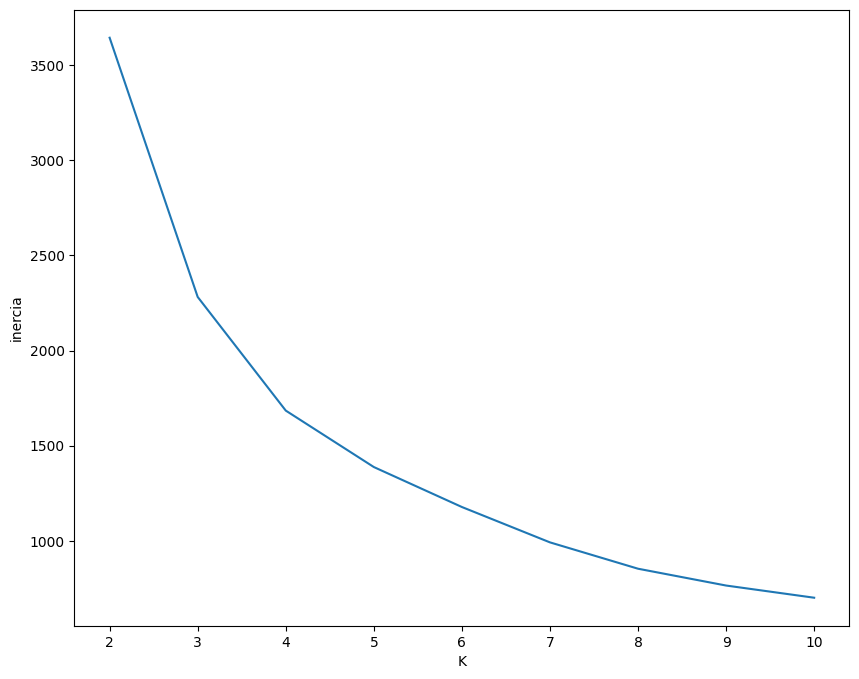

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = eva, x = "K", y = "inercia")

## Clustering

In [23]:
kmeans2 = KMeans(n_clusters=4, random_state=0)

In [24]:
kmeans2.fit(X_norm)

KMeans(n_clusters=4, random_state=0)

In [25]:
kmeans2.cluster_centers_

array([[ 0.3781588 ,  4.02890674,  0.50478513,  3.56014477],
       [-0.8070965 , -0.17708292,  0.35895741, -0.15245885],
       [ 1.15812739, -0.18804398,  0.49846788, -0.15522911],
       [-0.56794355, -0.23159892, -1.4105983 , -0.22742763]])

In [26]:
data_reduce2=data_reduce.copy()

In [27]:
data_reduce2['cluster'] = kmeans2.labels_

In [28]:
data_reduce2.head()

,entidades,money,time,information,frequencies,cluster
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.000000,1.000000,0.000000,1
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,1.000000,0.555556,0.555556,0.333333,2
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.000000,0.669725,0.000000,1
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0.090909,0.000000,0.818182,0.000000,1
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,1.000000,2.000000,1.500000,1.000000,0


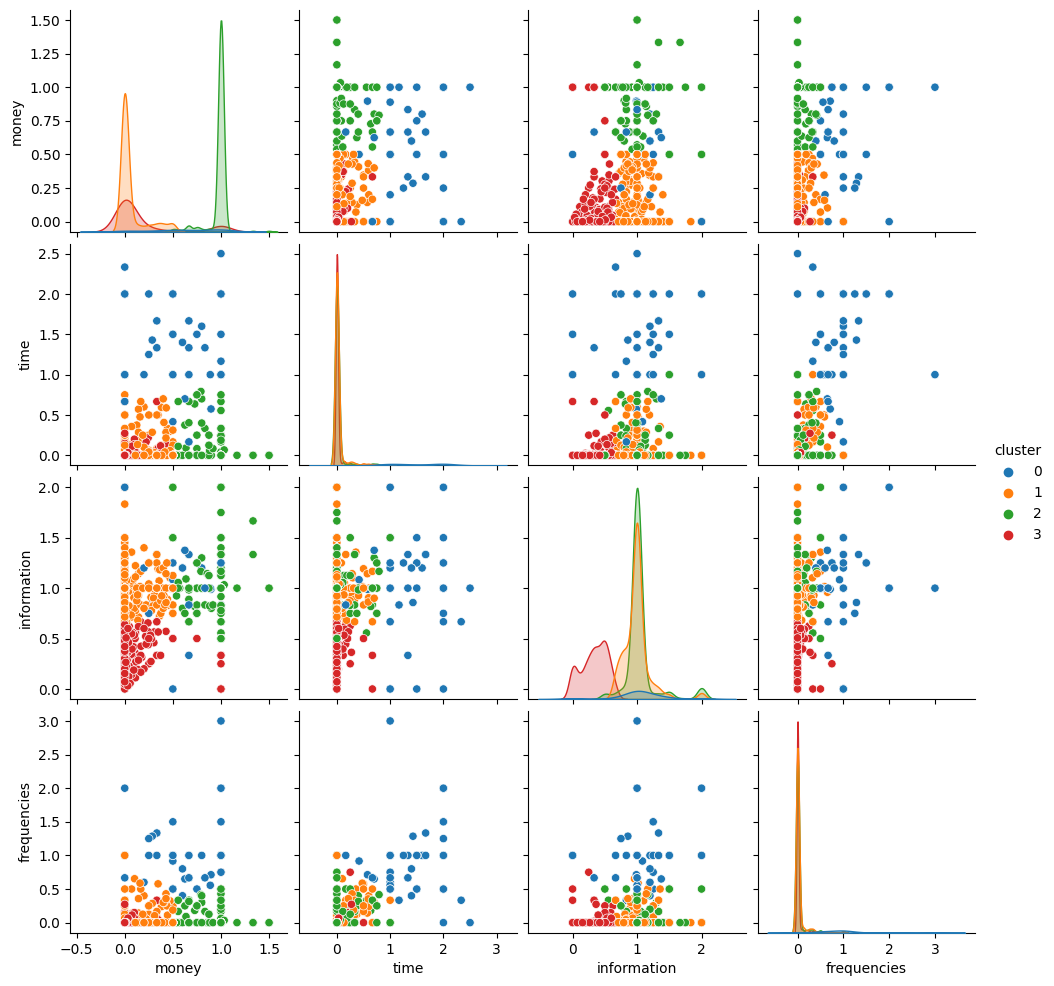

In [29]:
sns.pairplot(data_reduce2,hue="cluster", palette="tab10")

<AxesSubplot:xlabel='cluster', ylabel='money'>

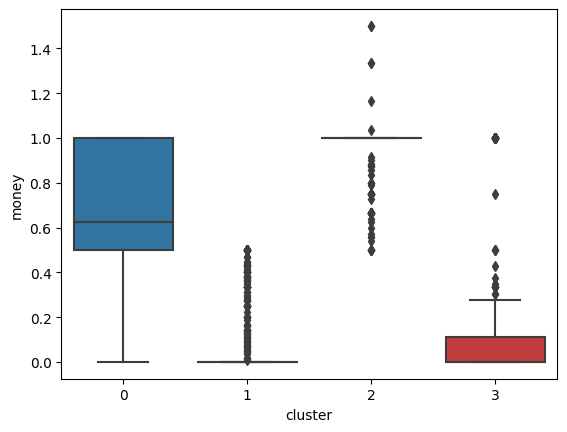

In [30]:
sns.boxplot(x='cluster', y='money', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='time'>

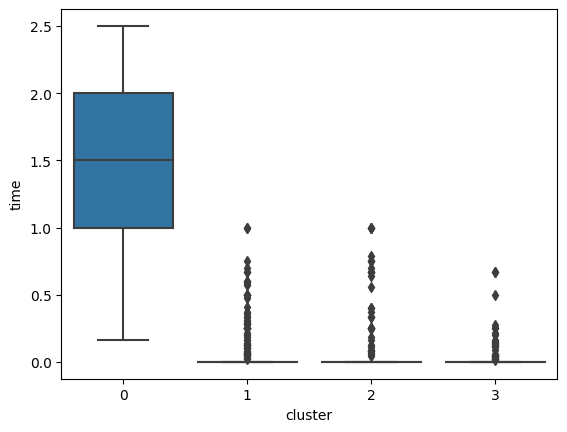

In [31]:
sns.boxplot(x='cluster', y='time', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='information'>

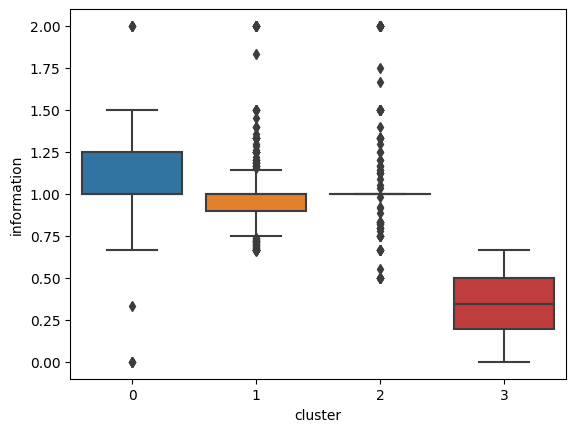

In [32]:
sns.boxplot(x='cluster', y='information', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='frequencies'>

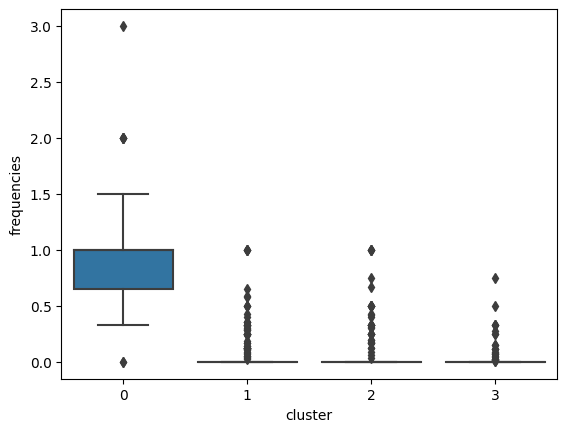

In [33]:
sns.boxplot(x='cluster', y='frequencies', data=data_reduce2)

In [34]:
data_reduce2

,entidades,money,time,information,frequencies,cluster
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.000000,1.000000,0.000000,1
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,1.000000,0.555556,0.555556,0.333333,2
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.000000,0.669725,0.000000,1
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0.090909,0.000000,0.818182,0.000000,1
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,1.000000,2.000000,1.500000,1.000000,0
...,...,...,...,...,...,...
1406,junta parroquial de cuyuja,1.000000,0.000000,1.000000,0.000000,2
1407,junta parroquial la tola,1.000000,0.000000,1.000000,0.000000,2
1408,juntaparroquialbuenavista,1.000000,0.000000,1.333333,0.000000,2
1409,juntaparroquialsalango,1.000000,0.000000,1.000000,0.000000,2


In [35]:
buyers_info=parties.loc[parties['roles']=="buyer"]
buyers_info=buyers_info[["ocid","name","address_region"]]

In [36]:
buyers_info.columns=["ocid","entidades","address_region"]

In [37]:
buyers_info=buyers_info.loc[buyers_info['entidades'].notnull()]

In [38]:
cluster_0=data_reduce2.loc[data_reduce2['cluster']==0]

In [39]:
cluster_0=cluster_0.merge(buyers_info[["entidades","address_region"]], on="entidades", how="left")

In [40]:
cluster_1=data_reduce2.loc[data_reduce2['cluster']==1]
cluster_1=cluster_1.merge(buyers_info[["entidades","address_region"]], on="entidades", how="left")

In [41]:
cluster_1

,entidades,money,time,information,frequencies,cluster,address_region
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.0,1.000000,0.0,1,BOLIVAR
1,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.0,0.669725,0.0,1,NaN
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.0,0.669725,0.0,1,NaN
3,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.0,0.669725,0.0,1,NaN
4,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.0,0.669725,0.0,1,NaN
...,...,...,...,...,...,...,...
5734,Universidad Nacional de Chimborazo,0.000000,0.0,0.791667,0.0,1,CHIMBORAZO
5735,Universidad Nacional de Chimborazo,0.000000,0.0,0.791667,0.0,1,CHIMBORAZO
5736,Universidad Nacional de Chimborazo,0.000000,0.0,0.791667,0.0,1,CHIMBORAZO
5737,Universidad Técnica de Manabí,0.000000,0.0,2.000000,0.0,1,MANABI


In [42]:
cluster_1['entidades'][1]

'AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANITARIO'

In [43]:
buyers_info.loc[buyers_info['entidades']=='AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANITARIO']

,ocid,entidades,address_region
5354,ocds-5wno2w-CE-20190001560457-874068,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,NaN
5356,ocds-5wno2w-CE-20190001560458-874068,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,NaN
5359,ocds-5wno2w-CE-20190001560459-874068,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,NaN
5360,ocds-5wno2w-CE-20190001560460-874068,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,NaN
5363,ocds-5wno2w-CE-20190001560461-874068,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,NaN
...,...,...,...
19625,ocds-5wno2w-CE-20200001887351-869714,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,PICHINCHA
19628,ocds-5wno2w-CE-20200001887353-869714,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,PICHINCHA
19629,ocds-5wno2w-CE-20200001887354-869714,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,PICHINCHA
19631,ocds-5wno2w-CE-20200001887355-869714,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,PICHINCHA


group_1=buyers_info.groupby(["name","address_region"]).agg({'ocid':'count'}).reset_index()

grupo_2=group_1.groupby("address_region").agg({'ocid':np.sum}).reset_index()

grupo_2.sort_values(by='ocid', ascending = False, inplace = True)